# 입문자를 위한, 파이썬/R 데이터 분석  

]

## Today's mission

- Ensemble Learinig (개념, 하드보팅, 소프트보팅)
- ML 데이터 처리 관련 추가정리 (LabelEncoder, Scaler, Validation)

]

## Label Encoder

In [1]:
items = ['냉장고', '에어컨', ' TV', '컴퓨터', '에어컨', ' TV', '컴퓨터']
items

['냉장고', '에어컨', ' TV', '컴퓨터', '에어컨', ' TV', '컴퓨터']

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [4]:
encoder.fit(items)

LabelEncoder()

In [5]:
result = encoder.transform(items)

In [6]:
print(encoder.classes_, result)

[' TV' '냉장고' '에어컨' '컴퓨터'] [1 2 0 3 2 0 3]


In [7]:
encoder.inverse_transform([1, 2, 0, 3, 2, 0, 3])

array(['냉장고', '에어컨', ' TV', '컴퓨터', '에어컨', ' TV', '컴퓨터'], dtype='<U3')

### vs. OneHot Encoder

In [8]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
items

['냉장고', '에어컨', ' TV', '컴퓨터', '에어컨', ' TV', '컴퓨터']

In [10]:
encoder = LabelEncoder()
encoder.fit(items)

LabelEncoder()

In [11]:
result = encoder.transform(items)
result

array([1, 2, 0, 3, 2, 0, 3])

In [12]:
label = np.array(result).reshape(-1,1)
label

array([[1],
       [2],
       [0],
       [3],
       [2],
       [0],
       [3]])

In [13]:
on_hot = OneHotEncoder()

In [14]:
on_hot.fit(label)

OneHotEncoder()

In [15]:
on_hot.transform(label)

<7x4 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [16]:
print(encoder.classes_)

[' TV' '냉장고' '에어컨' '컴퓨터']


In [17]:
print(label)

[[1]
 [2]
 [0]
 [3]
 [2]
 [0]
 [3]]


In [18]:
on_hot.transform(label).toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

## Scaler

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.datasets import load_iris
import pandas as pd

In [21]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data)
df_iris.head(3)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [22]:
df_iris

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
df_iris.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
### 데이터 5.1에 대해서 MinMax Scaling
(5.1 - 4.3) / (7.9 - 4.3)

0.22222222222222213

참고 : https://mkjjo.github.io/python/2019/01/10/scaler.html

In [25]:
m_scaler = MinMaxScaler()
s_scaler = StandardScaler()

In [26]:
m_scaler.fit(df_iris)

MinMaxScaler()

In [27]:
m_scaler.transform(df_iris)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [28]:
s_scaler.fit(df_iris)

StandardScaler()

In [29]:
s_scaler.transform(df_iris)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Validation

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
iris = load_iris()
X_train = iris.data
y_train = iris.target

In [32]:
X_train

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [33]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
dt_clf = DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier()

In [35]:
X1, X_test, y1, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=222)

In [36]:
dt_clf.fit(X1, y1)

DecisionTreeClassifier()

In [37]:
print(X_test)#, X_test, y1, y_test)

[[4.9 3.  1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [6.  2.2 5.  1.5]
 [5.7 2.9 4.2 1.3]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.4 2.9 4.3 1.3]
 [6.3 2.7 4.9 1.8]
 [5.8 2.6 4.  1.2]
 [6.4 3.1 5.5 1.8]
 [5.8 2.8 5.1 2.4]
 [7.7 2.6 6.9 2.3]
 [5.7 3.8 1.7 0.3]
 [6.7 3.  5.2 2.3]
 [6.7 3.1 4.4 1.4]
 [7.2 3.  5.8 1.6]
 [5.2 3.5 1.5 0.2]
 [4.5 2.3 1.3 0.3]
 [6.  2.9 4.5 1.5]
 [6.2 2.9 4.3 1.3]
 [5.8 2.7 5.1 1.9]
 [4.8 3.4 1.6 0.2]
 [6.5 3.  5.8 2.2]
 [5.5 3.5 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [6.  2.2 4.  1. ]
 [4.7 3.2 1.3 0.2]
 [5.4 3.4 1.5 0.4]]


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
pred = dt_clf.predict(X_test)
pred

array([0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2,
       0, 2, 0, 0, 1, 1, 0, 0])

In [40]:
accuracy_score(y_test, pred)

0.9

참고 : https://blog.naver.com/sjy5448/222457108646

In [41]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [42]:
iris = load_iris()
X_train = iris.data
y_train = iris.target

In [43]:
dt_clf = DecisionTreeClassifier()

In [44]:
kfold = KFold(n_splits=5)
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [45]:
scores = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring = 'accuracy')
print(scores, '\n',
      scores.mean())

[0.96666667 0.96666667 0.9        1.         1.        ] 
 0.9666666666666668


## 변수선택법(Feature Selection)

- 참고 : https://zephyrus1111.tistory.com/65

- AIC(Akaike's informarion criteria) 지표: 회귀모델에 항을 추가할 수록 불이익을 주는 지표
- 참고 : https://forensics.tistory.com/79

In [46]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [47]:
## Data Import
df = pd.read_csv('data/surgical_unit.csv') ## 데이터 불러오기

In [48]:
df.head()

,Blood_Clotting_Score,Prognostic_Index,Enzyme_Test,Liver_Test,Age,Gender,Alc_Mod,Alc_Heavy,Survival_Time,Log_ST
0,6.7,62,81,2.59,50,0,1,0,695,6.544
1,5.1,59,66,1.70,39,0,0,0,403,5.999
2,7.4,57,83,2.16,55,0,0,0,710,6.565
3,6.5,73,41,2.01,48,0,0,0,349,5.854
4,7.8,65,115,4.30,45,0,0,1,2343,7.759


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Blood_Clotting_Score  54 non-null     float64
 1   Prognostic_Index      54 non-null     int64  
 2   Enzyme_Test           54 non-null     int64  
 3   Liver_Test            54 non-null     float64
 4   Age                   54 non-null     int64  
 5   Gender                54 non-null     int64  
 6   Alc_Mod               54 non-null     int64  
 7   Alc_Heavy             54 non-null     int64  
 8   Survival_Time         54 non-null     int64  
 9   Log_ST                54 non-null     float64
dtypes: float64(3), int64(7)
memory usage: 4.3 KB


### 전진 선택법(Forward Selection)
- 전진 선택법은 기존 모형에 가장 설명력이 좋은 변수를 하나씩 추가하는 방법
- 장점 : 전진 선택법은 구현 과정이 간단하고 변수가 많은 상황에서도 사용할 수 있다
- 단점 : 한번 선택된 변수는 계속 모형에 존재하며, 일치성(샘플수가 많아질수록 실제 모형에 수렴하는 성질)이 만족되지 않는다

In [50]:
import warnings
warnings.filterwarnings(action='ignore')

In [51]:
## 전진 선택법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
variables

['Blood_Clotting_Score',
 'Prognostic_Index',
 'Enzyme_Test',
 'Liver_Test',
 'Age',
 'Gender',
 'Alc_Mod',
 'Alc_Heavy']

In [52]:
y = df['Survival_Time'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05

In [53]:
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [54]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [55]:
### 선택 변수 확인
selected_variables

['Liver_Test',
 'Alc_Heavy',
 'Enzyme_Test',
 'Prognostic_Index',
 'Blood_Clotting_Score']

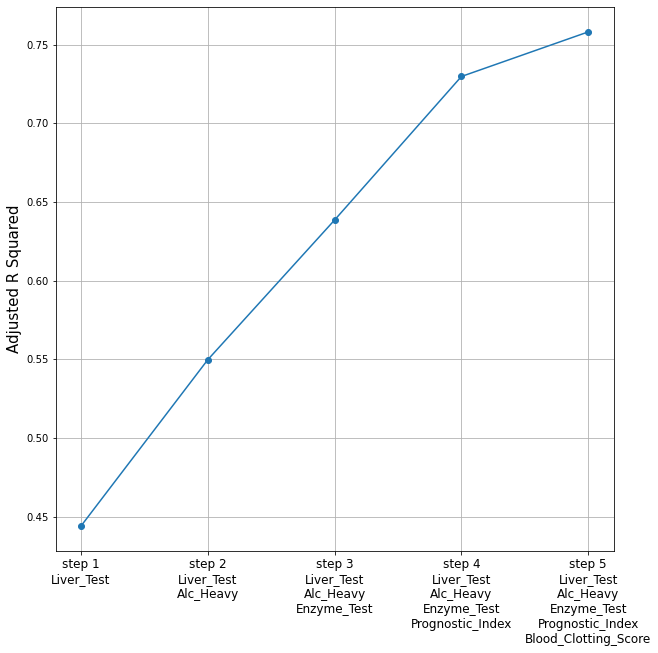

In [56]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

### 후진 소거법(Backward Elimination)
- 전진 선택법과는 반대로 모든 변수가 포함된 모형에서 설명력이 가정 적은 변수를 제거해나가는 방벙
- 장점 : 후진 소거법 또한 전진 선택법과 마찬가지로 구현 과정이 간단하고 변수가 많은 데이터에 적용 가능하다
- 단점 : 하지만 한번 제외된 변수는 다시는 모형에 포함될 수 없으며, 일치성을 만족하지 않는다

In [57]:
## 후진 소거법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
variables

['Blood_Clotting_Score',
 'Prognostic_Index',
 'Enzyme_Test',
 'Liver_Test',
 'Age',
 'Gender',
 'Alc_Mod',
 'Alc_Heavy']

In [58]:
y = df['Survival_Time'] ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05 

In [59]:
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [60]:
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [61]:
selected_variables

['Blood_Clotting_Score', 'Prognostic_Index', 'Enzyme_Test', 'Alc_Heavy']

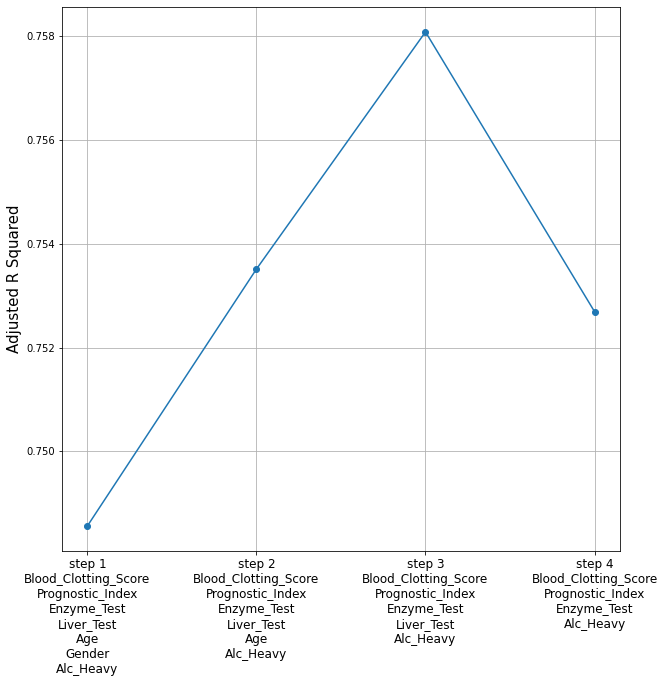

In [62]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

### 단계별 선택법(Forward Stepwise Selection)
- 전진 선택법에서 후진 소거법을 추가한 방법
- 장점 : 단계별 선택법은 구현 과정이 간단하고 한번 들어간 변수는 계속 포함된다는 전진 선택법의 단점을 일부 보완했다
- 단점 : 하지만  변수가 많아지면 계산량이 늘어난다는 것, 일치성을 만족하지 않는다

**만약 변수 선택법을 수행해야 한다면 전진 선택법, 후진 소거법 보다는 단계별 선택법을 사용하시길 추천**   
**변수를 선택하는 것은 객관적인 이론은 없고 단순히 경험과 분석자의 판단에 많이 의존하는 경우가 많음**

In [63]:
## 전진 단계별 선택법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
variables

['Blood_Clotting_Score',
 'Prognostic_Index',
 'Enzyme_Test',
 'Liver_Test',
 'Age',
 'Gender',
 'Alc_Mod',
 'Alc_Heavy']

In [64]:
y = df['Survival_Time'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05

In [65]:
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [66]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [67]:
selected_variables

['Alc_Heavy', 'Enzyme_Test', 'Prognostic_Index', 'Blood_Clotting_Score']

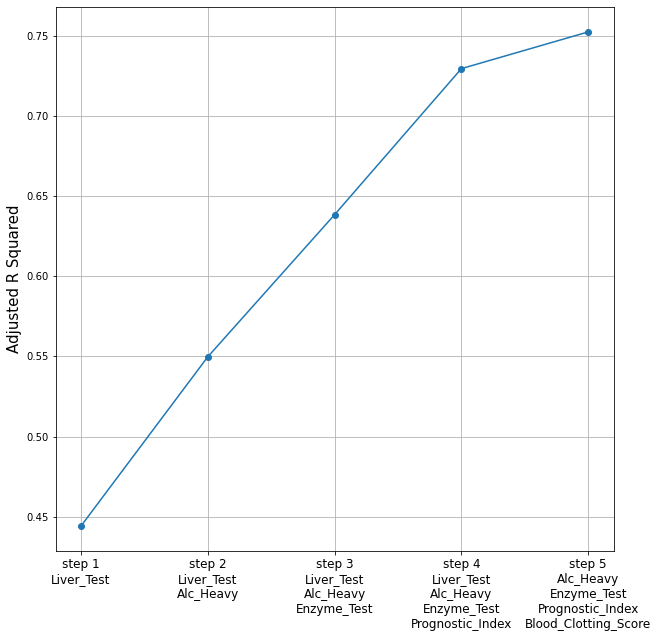

In [68]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()